In [11]:
import numpy as np
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
from eofs.standard import Eof
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Load in the datasets 
sst = xr.open_dataset('sst_monthly.nc')['sst']
msl = xr.open_dataset('msl_monthly.nc')['msl']
u10 = xr.open_dataset('u10_monthly.nc')['u10']
v10 = xr.open_dataset('v10_monthly.nc')['v10']

In [15]:
# slice data for the specified region, 30S–30N, 100E–70W
region = dict(latitude=slice(30, -30), longitude=slice(100, 290)) # 70W == 360-70=290 degrees

# reduce datasets to information for the specified region only
# xr.sel selects the coordinates defined in region from dataset xr
sst_red = sst.sel(**region)
msl_red = msl.sel(**region)
u10_red = u10.sel(**region)
v10_red = v10.sel(**region) 

In [23]:
# Step 1: Compute the monthly climatology
climatology = sst_red.groupby("time.month").mean("time")

# Step 2: Subtract climatology to deseasonalize
deseasoned_sst = sst_red.groupby("time.month") - climatology
deseasoned_sst

<xarray.DataArray 'sst' (time: 459, latitude: 81, longitude: 253)> Size: 75MB
array([[[        nan,         nan,         nan, ...,  0.43397739,
          0.38122884,  0.33992995],
        [        nan,         nan,         nan, ...,  0.26258699,
          0.22002447,  0.17687638],
        [        nan,         nan,         nan, ...,  0.08151908,
          0.05573809, -0.00775125],
        ...,
        [-0.12161599, -0.0219593 ,  0.05764894, ...,  0.80554414,
          0.93639074,         nan],
        [ 0.04371827,  0.12986036,  0.20738824, ...,  0.84220461,
                 nan,         nan],
        [ 0.15537938,  0.21718903,  0.26642408, ...,  0.8896367 ,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -0.04673863,
         -0.0803171 , -0.17052744],
        [        nan,         nan,         nan, ..., -0.18829521,
         -0.23608173, -0.33342691],
        [        nan,         nan,         nan, ..., -0.34362836,
         -0.41585519, -0.52269296],
...
        [-0.57906286, -0.48410623, -0.39133782, ...,  1.28630639,
          0.08786802,         nan],
        [-0.69345155, -0.52454216, -0.38728498, ...,  0.54884379,
                 nan,         nan],
        [-0.50973312, -0.47211722, -0.27902949, ...,  0.5814206 ,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,  0.26841198,
          0.52394117,  0.6138279 ],
        [        nan,         nan,         nan, ...,  0.16117355,
          0.29564151,  0.28092493],
        [        nan,         nan,         nan, ...,  0.18185382,
          0.2128434 , -0.12106123],
        ...,
        [-0.43590364, -0.51392465, -0.41072365, ...,  1.07061214,
         -0.18502828,         nan],
        [-0.33649351, -0.37070379, -0.28759747, ...,  0.11522083,
                 nan,         nan],
        [-0.25465082, -0.15174261, -0.15786039, ..., -0.13039971,
                 nan,         nan]]])
Coordinates:
  * longitude  (longitude) float32 1kB 100.5 101.2 102.0 ... 288.0 288.8 289.5
  * latitude   (latitude) float32 324B 30.0 29.25 28.5 ... -28.5 -29.25 -30.0
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2017-03-01
    month      (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 ... 6 7 8 9 10 11 12 1 2 3

In [62]:
# Mean temperatures for all lon & lat
sst_mean0 = sst_red.mean(dim='latitude', skipna=True)
sst_mean = sst_mean0.mean(dim='longitude', skipna=True)
sst_mean

<xarray.DataArray 'sst' (time: 459)> Size: 4kB
array([298.87672864, 298.93464549, 299.16859527, 299.41593237,
       299.46615979, 299.38221436, 299.14570536, 299.06614898,
       299.20484512, 299.23368887, 299.19259479, 299.09607941,
       299.11707752, 299.13107444, 299.43790727, 299.52610433,
       299.63600696, 299.49330168, 299.25146335, 299.05604679,
       299.11045544, 299.09997593, 299.09351161, 298.95364757,
       298.79826865, 298.89042545, 299.19367774, 299.41909664,
       299.56626739, 299.46310525, 299.23205313, 299.00895684,
       299.1656836 , 299.15729741, 299.13607778, 299.05533229,
       299.12376477, 299.11812328, 299.31680196, 299.4588436 ,
       299.55713298, 299.45832133, 299.19292259, 299.0936184 ,
       299.14479279, 299.31651071, 299.32657233, 299.34598549,
       299.29903542, 299.35642233, 299.46872425, 299.61094674,
       299.63944528, 299.67537473, 299.32881712, 299.1672512 ,
       299.22292923, 299.28812345, 299.16427755, 299.05798588,
       299.05577474, 299.19945328, 299.33884007, 299.50223819,
       299.50293653, 299.29108654, 299.18158247, 299.00735245,
       299.17019469, 299.03083376, 299.02344854, 298.76112574,
       298.76158386, 299.00313139, 299.16406126, 299.24329381,
       299.31929193, 299.22331595, 299.05807871, 298.87333639,
...
       299.11072482, 299.09366999, 298.95325978, 298.81693279,
       298.75316833, 298.95617211, 299.20251043, 299.40065183,
       299.51007332, 299.42591253, 299.14761595, 299.00058545,
       298.95501105, 298.99711915, 299.03123383, 298.9633209 ,
       298.99594087, 299.19156247, 299.42059429, 299.63013634,
       299.71249248, 299.53580565, 299.31147158, 299.13805928,
       299.1958022 , 299.29690307, 299.33553986, 299.28726483,
       299.11272856, 299.28690407, 299.46489554, 299.69048858,
       299.69027593, 299.57079113, 299.40416004, 299.29523271,
       299.32570286, 299.28218297, 299.2707952 , 299.21511634,
       299.12980462, 299.18580054, 299.4307919 , 299.64351277,
       299.82648398, 299.76455289, 299.57012491, 299.46226615,
       299.49244204, 299.49164578, 299.48452889, 299.34618468,
       299.21593726, 299.33974661, 299.57352715, 299.89809563,
       299.95792642, 299.93785462, 299.7566361 , 299.68982446,
       299.77517594, 299.74957946, 299.85866852, 299.73564332,
       299.74180728, 299.74996493, 299.96825078, 300.07699379,
       300.12524033, 300.08810208, 299.89120405, 299.66516101,
       299.62156921, 299.66141756, 299.59445418, 299.48855944,
       299.46844747, 299.57615925, 299.82228475])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2017-03-01

In [68]:
# Mean deseasoned temperatures for all lon & lat
des_sst_mean0 = deseasoned_sst.mean(dim='latitude', skipna=True)
des_sst_mean = des_sst_mean0.mean(dim='longitude', skipna=True)
des_sst_mean

<xarray.DataArray 'sst' (time: 459)> Size: 4kB
array([-2.29438156e-01, -2.71823041e-01, -2.46345425e-01, -1.70568104e-01,
       -1.74841322e-01, -1.63697562e-01, -2.00761686e-01, -1.46743628e-01,
       -4.44381227e-02, -4.67042314e-02, -7.07772228e-02, -5.98859685e-02,
        1.09107251e-02, -7.53940841e-02,  2.29665766e-02, -6.03961453e-02,
       -4.99415636e-03, -5.26102436e-02, -9.50036967e-02, -1.56845813e-01,
       -1.38827806e-01, -1.80417173e-01, -1.69860402e-01, -2.02317809e-01,
       -3.07898147e-01, -3.16043078e-01, -2.21262948e-01, -1.67403836e-01,
       -7.47337268e-02, -8.28066719e-02, -1.14413920e-01, -2.03935763e-01,
       -8.35996452e-02, -1.23095696e-01, -1.27294240e-01, -1.00633084e-01,
        1.75979684e-02, -8.83452470e-02, -9.81387253e-02, -1.27656878e-01,
       -8.38681320e-02, -8.75905939e-02, -1.53544462e-01, -1.19274201e-01,
       -1.04490452e-01,  3.61176021e-02,  6.32003108e-02,  1.90020116e-01,
        1.92868620e-01,  1.49953799e-01,  5.37835642e-02,  2.44462597e-02,
       -1.55584000e-03,  1.29462808e-01, -1.76499314e-02, -4.56414007e-02,
       -2.63540112e-02,  7.73034745e-03, -9.90944708e-02, -9.79794933e-02,
       -5.03920580e-02, -7.01525049e-03, -7.61006249e-02, -8.42622896e-02,
       -1.38064592e-01, -2.54825383e-01, -1.64884582e-01, -2.05540157e-01,
       -7.90885593e-02, -2.49559347e-01, -2.39923479e-01, -3.94839641e-01,
       -3.44582933e-01, -2.03337139e-01, -2.50879428e-01, -3.43206671e-01,
       -3.21709183e-01, -3.22595965e-01, -2.88388334e-01, -3.39556215e-01,
...
       -1.38558424e-01, -1.86723118e-01, -3.10112232e-01, -3.39032588e-01,
       -3.52998469e-01, -2.50296420e-01, -2.12430259e-01, -1.85848649e-01,
       -1.30927794e-01, -1.19999393e-01, -1.98851096e-01, -2.12307153e-01,
       -2.94272193e-01, -2.83273952e-01, -2.32138186e-01, -1.92644478e-01,
       -1.10225932e-01, -1.49060595e-02,  5.65360129e-03,  4.36358633e-02,
        7.14913587e-02, -1.01062733e-02, -3.49954663e-02, -7.48333243e-02,
       -5.34810433e-02,  1.65099656e-02,  7.21678407e-02,  1.31299451e-01,
        6.56176596e-03,  8.04355427e-02,  4.99548451e-02,  1.03988098e-01,
        4.92748122e-02,  2.48792066e-02,  5.76929923e-02,  8.23401108e-02,
        7.64196156e-02,  1.78986971e-03,  7.42318447e-03,  5.91509596e-02,
        2.36378196e-02, -2.06679825e-02,  1.58512052e-02,  5.70122956e-02,
        1.85482865e-01,  2.18640966e-01,  2.23657865e-01,  2.49373547e-01,
        2.43158799e-01,  2.11252681e-01,  2.21156874e-01,  1.90219302e-01,
        1.09770465e-01,  1.33278086e-01,  1.58586461e-01,  3.11595155e-01,
        3.16925300e-01,  3.91942705e-01,  4.10169055e-01,  4.76931854e-01,
        5.25892692e-01,  4.69186356e-01,  5.95296507e-01,  5.79677939e-01,
        6.35640482e-01,  5.43496408e-01,  5.53310091e-01,  4.90493315e-01,
        4.84239216e-01,  5.42190161e-01,  5.44737006e-01,  4.52268411e-01,
        3.72285967e-01,  3.81024454e-01,  3.31082164e-01,  3.32594060e-01,
        3.62280675e-01,  3.69690723e-01,  4.07344057e-01])
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2017-03-01
    month    (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3

<function matplotlib.pyplot.show(close=None, block=None)>

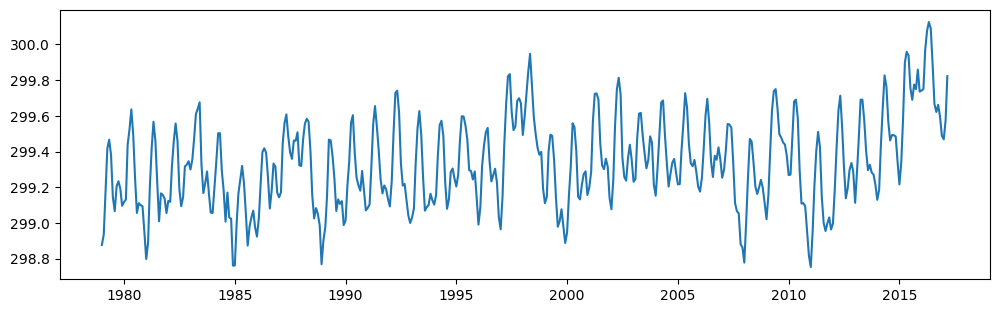

In [94]:
# Plot seasonal
plt.figure(figsize = (12,3.5))
plt.plot(sst_red.time,sst_mean)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

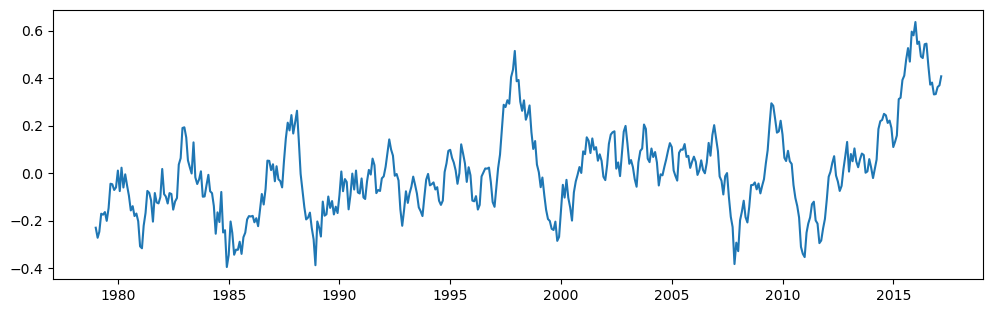

In [92]:
# plot deseasoned 
plt.figure(figsize = (12,3.5))
plt.plot(des_sst_mean.time, des_sst_mean.values)
plt.show